# Ejemplos de regresión

In [10]:
using DataFrames
using MLDatasets
using Random
using Statistics
using Plots
# Se carga el script
include("GRNN.jl")

GRNN (generic function with 5 methods)

## Precios de las casas de Boston 

El *Boston Housing Dataset* se deriva de la información recopilada por el Servicio del Censo de EE. UU. sobre viviendas en el área de Boston, MA. A continuación se describen las columnas del conjunto de datos:

- **CRIM**: tasa de criminalidad per cápita por ciudad.
- **ZN**: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
- **INDUS**: proporción de acres de negocios no minoristas por ciudad.
- **CHAS**: variable ficticia del río Charles (1 si la zona limita con el río; 0 de lo contrario).
- **NOX**: concentración de óxidos nítricos (partes por 10 millones).
- **RM**: número promedio de habitaciones por vivienda.
- **AGE**: proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
- **DIS**: distancias ponderadas a cinco centros de empleo en Boston.
- **RAD**: índice de accesibilidad a carreteras radiales.
- **TAX**: tasa de impuesto predial de valor completo por $10,000.
- **PTRATIO**: ratio de alumnos por maestro por ciudad.
- **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de personas afroamericanas por ciudad.
- **LSTAT**: % de la población de bajo estatus.
- **MEDV**: valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares.


Se cargan los datos:

In [2]:
using MLDatasets: BostonHousing
X, y = BostonHousing(as_df=false)[:]
X = X'
y = y';

In [3]:
dataset = BostonHousing()
dataset[1:5][1]

Row,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Float64
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33


In [4]:
dataset[1:5][2]

Row,MEDV
,Float64
1,24.0
2,21.6
3,34.7
4,33.4
5,36.2


Se separan los conjuntos de datos:

In [5]:
# Definir la proporción de entrenamiento
proporcion_entrenamiento = 0.75

# Obtener el número de muestras
n = size(X, 1)

# Calcular el número de muestras de entrenamiento
n_entrenamiento = Int(round(proporcion_entrenamiento * n))

# Generar una permutación aleatoria de los índices
Random.seed!(1234) # Fijar la semilla para reproducibilidad
indices = Random.shuffle(1:n)

# Obtener los índices para entrenamiento y prueba
indices_entrenamiento = indices[1:n_entrenamiento]
indices_prueba = indices[n_entrenamiento+1:end]

# Crear los conjuntos de entrenamiento y prueba
x0 = X[indices_entrenamiento, :]
y0 = y[indices_entrenamiento]

x1 = X[indices_prueba, :]
y1 = y[indices_prueba];

# Cantidad de centroides
k0 = Int(round(0.6*size(x0, 1)));
# Bandwidth
h = 0.8

y1_pred = GRNN(x1, y0, x0, h, "gaussiano", true, true, k0);

y

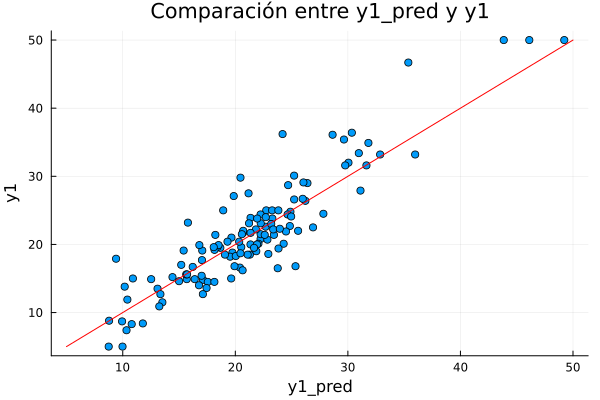

In [11]:
# Crear el gráfico de dispersión
scatter(y1_pred, y1, xlabel="y1_pred", ylabel="y1", title="Comparación entre y1_pred y y1", label="")

# Agregar la línea de identidad (y = x) en color rojo
identity_line = LinRange(minimum([minimum(y1_pred), minimum(y1)]), maximum([maximum(y1_pred), maximum(y1)]), 100)
plot!(identity_line, identity_line, linecolor=:red, label="")

In [101]:
# Calcular el error cuadrático medio (MSE)
mse = mean((y1 .- y1_pred) .^ 2)
# Calcular la raíz del error cuadrático medio (RMSE)
rmse = sqrt(mse)

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 126 and 500

In [102]:
# Correlación
cor(y1, y1_pred)

DimensionMismatch: DimensionMismatch: inconsistent lengths

# Datos concreto

In [103]:
# Ruta relativa al archivo CSV
ruta_datos = "../Bases de datos/Concrete_Data.csv"

# Leer el archivo CSV y almacenarlo en un DataFrame
df = CSV.read(ruta_datos, DataFrame)

UndefVarError: UndefVarError: `CSV` not defined

In [104]:
# Obtener la columna 9 como un vector
y = df[:, 9]
# Obtener todas las demás columnas como una matriz
X = Matrix(df[:, Not(9)]);

UndefVarError: UndefVarError: `df` not defined

In [105]:
# Definir la proporción de entrenamiento
proporcion_entrenamiento = 0.8

# Obtener el número de muestras
n = size(X, 1)

# Calcular el número de muestras de entrenamiento
n_entrenamiento = Int(round(proporcion_entrenamiento * n))

# Generar una permutación aleatoria de los índices
Random.seed!(1234) # Fijar la semilla para reproducibilidad
indices = Random.shuffle(1:n)

# Obtener los índices para entrenamiento y prueba
indices_entrenamiento = indices[1:n_entrenamiento]
indices_prueba = indices[n_entrenamiento+1:end]

# Crear los conjuntos de entrenamiento y prueba
x0 = X[indices_entrenamiento, :]
y0 = y[indices_entrenamiento]

x1 = X[indices_prueba, :]
y1 = y[indices_prueba];

# Cantidad de centroides
k0 = Int(round(0.6*size(x0, 1)));
# Bandwidth
h = 0.45

y1_pred = GRNN(x1, y0, x0, h, "gaussiano", true);

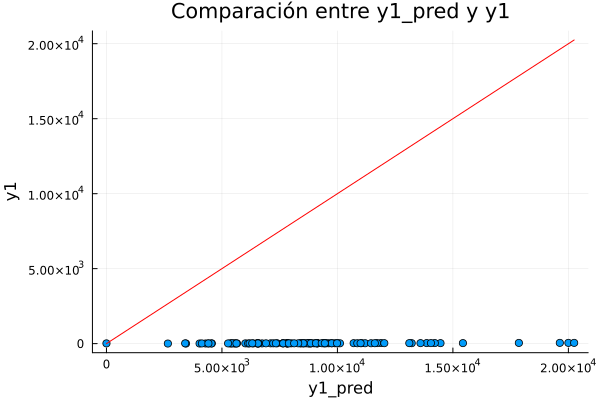

In [106]:
# Crear el gráfico de dispersión
scatter(y1_pred, y1, xlabel="y1_pred", ylabel="y1", title="Comparación entre y1_pred y y1", label="")

# Agregar la línea de identidad (y = x) en color rojo
identity_line = LinRange(minimum([minimum(y1_pred), minimum(y1)]), maximum([maximum(y1_pred), maximum(y1)]), 100)
plot!(identity_line, identity_line, linecolor=:red, label="")

In [107]:
# Correlación
cor(y1, y1_pred)

0.9288614607100132

# Ejemplo artificial

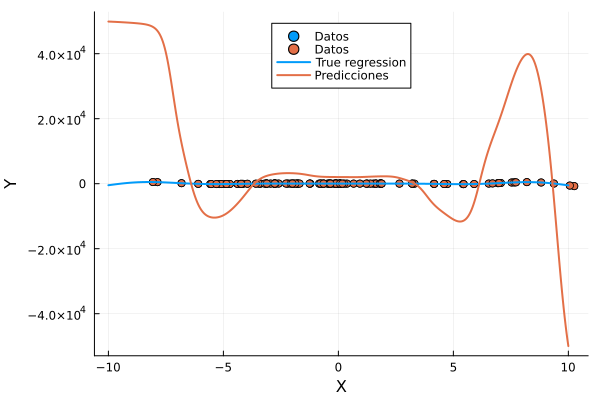

In [108]:
using Random
using Plots

# Configuración de la semilla para la reproducibilidad
Random.seed!(12345)

# Generación de los datos
n = 100
eps = randn(n) .* 2
m(x) = x^3 * sin(x) + x^2 * cos(x/2) - 2x + 5 +15
x0 = randn(n) .* 4  # Aumentar el rango de dispersión de x0
y0 = m.(x0) .+ eps
x1 = collect(range(-10, 10, length=500))  # Asegurarse de que xGrid sea un vector
y1 = m.(x1)

# Bandwidth
h = 0.5

# Se calcula el estimador de Nadaraya-Watson
# Aquí se asume que tienes una función GRNN definida en otro lugar
y1_pred = GRNN(x1, y0, x0, h, "gaussiano", false)

# Graficar los datos
plot(x0, y0, seriestype=:scatter, label="Datos", xlabel="X", ylabel="Y")
scatter!(x0, y0, label="Datos", legend=:top)

# Añadir las líneas correspondientes
plot!(x1, y1, label="True regression", color=1, linewidth=2)
plot!(x1, y1_pred, label="Predicciones", color=2, linewidth=2)



